# Assignment_1 - Machine Learning
# Mohammad Hossein Basouli - 401222020

## Sleep Health

### Exploratory Data Analysis (EDA):

#### Importing libraries

In [221]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from IPython.display import display

#### Loading dfset and getting an overall view of the df and it's shape

In [222]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
display(df.head())
df.shape

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


(374, 13)

#### Getting an overview of the columns, their data types, and their description

In [223]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### Figuring out the range of values assigned to categorical data types

In [224]:
categorical_dtypes = df.select_dtypes(exclude=[np.number])
for cat in categorical_dtypes:
    print(df[cat].unique()) 

['Male' 'Female']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
[nan 'Sleep Apnea' 'Insomnia']


#### Data Pre-processing:
##### Comparing the distribution of different features for each of the three groups in **Sleep Disorder**:
- In here we can see that, people with Sleep Disorder = NaN have similar symptoms to the healthy people. some of the evidences that I can point to are as follows:
    - Most of the people with Sleep Disorder = NaN have Normal BMI level.
    - Most of the people with Sleep Disorder = NaN have an even distribution over the normal range of heart rate, Bloody Pressure, Quality of Sleep and Stress Level.
    - People with Sleep Disorder = NaN, are evenly distributed between High stress jobs like Doctor, Lawyer and such, as well as low stress jobs like Engineer, Accountant and sales person.

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000
mean,43.519481,6.589610,6.532468,46.818182,5.87013,70.467532,5901.298701
std,4.808464,0.387157,0.804337,11.751514,1.46315,4.948643,1000.328039
min,28.000000,5.900000,4.000000,30.000000,3.00000,65.000000,3000.000000
25%,43.000000,6.400000,6.000000,45.000000,4.00000,65.000000,6000.000000
50%,44.000000,6.500000,7.000000,45.000000,7.00000,72.000000,6000.000000
75%,45.000000,6.600000,7.000000,45.000000,7.00000,72.000000,6000.000000
max,53.000000,8.300000,9.000000,90.000000,8.00000,85.000000,10000.000000


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,49.705128,7.032051,7.205128,74.794872,5.666667,73.089744,7619.230769
std,8.990773,0.974812,1.646397,17.926516,2.333643,5.117289,2168.191400
min,28.000000,5.800000,4.000000,30.000000,3.000000,68.000000,3000.000000
25%,49.000000,6.100000,6.000000,75.000000,3.000000,68.000000,7000.000000
50%,50.000000,6.800000,6.000000,75.000000,7.000000,75.000000,7000.000000
75%,57.750000,8.100000,9.000000,90.000000,8.000000,75.000000,10000.000000
max,59.000000,8.200000,9.000000,90.000000,8.000000,86.000000,10000.000000


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
std,7.827764,0.732320,0.975142,20.929814,1.591471,2.657797,1393.473600
min,27.000000,6.000000,6.000000,30.000000,3.000000,65.000000,4200.000000
25%,32.000000,7.100000,7.000000,30.000000,4.000000,68.000000,5000.000000
50%,38.000000,7.400000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,43.000000,7.800000,8.000000,75.000000,6.000000,70.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,77.000000,10000.000000


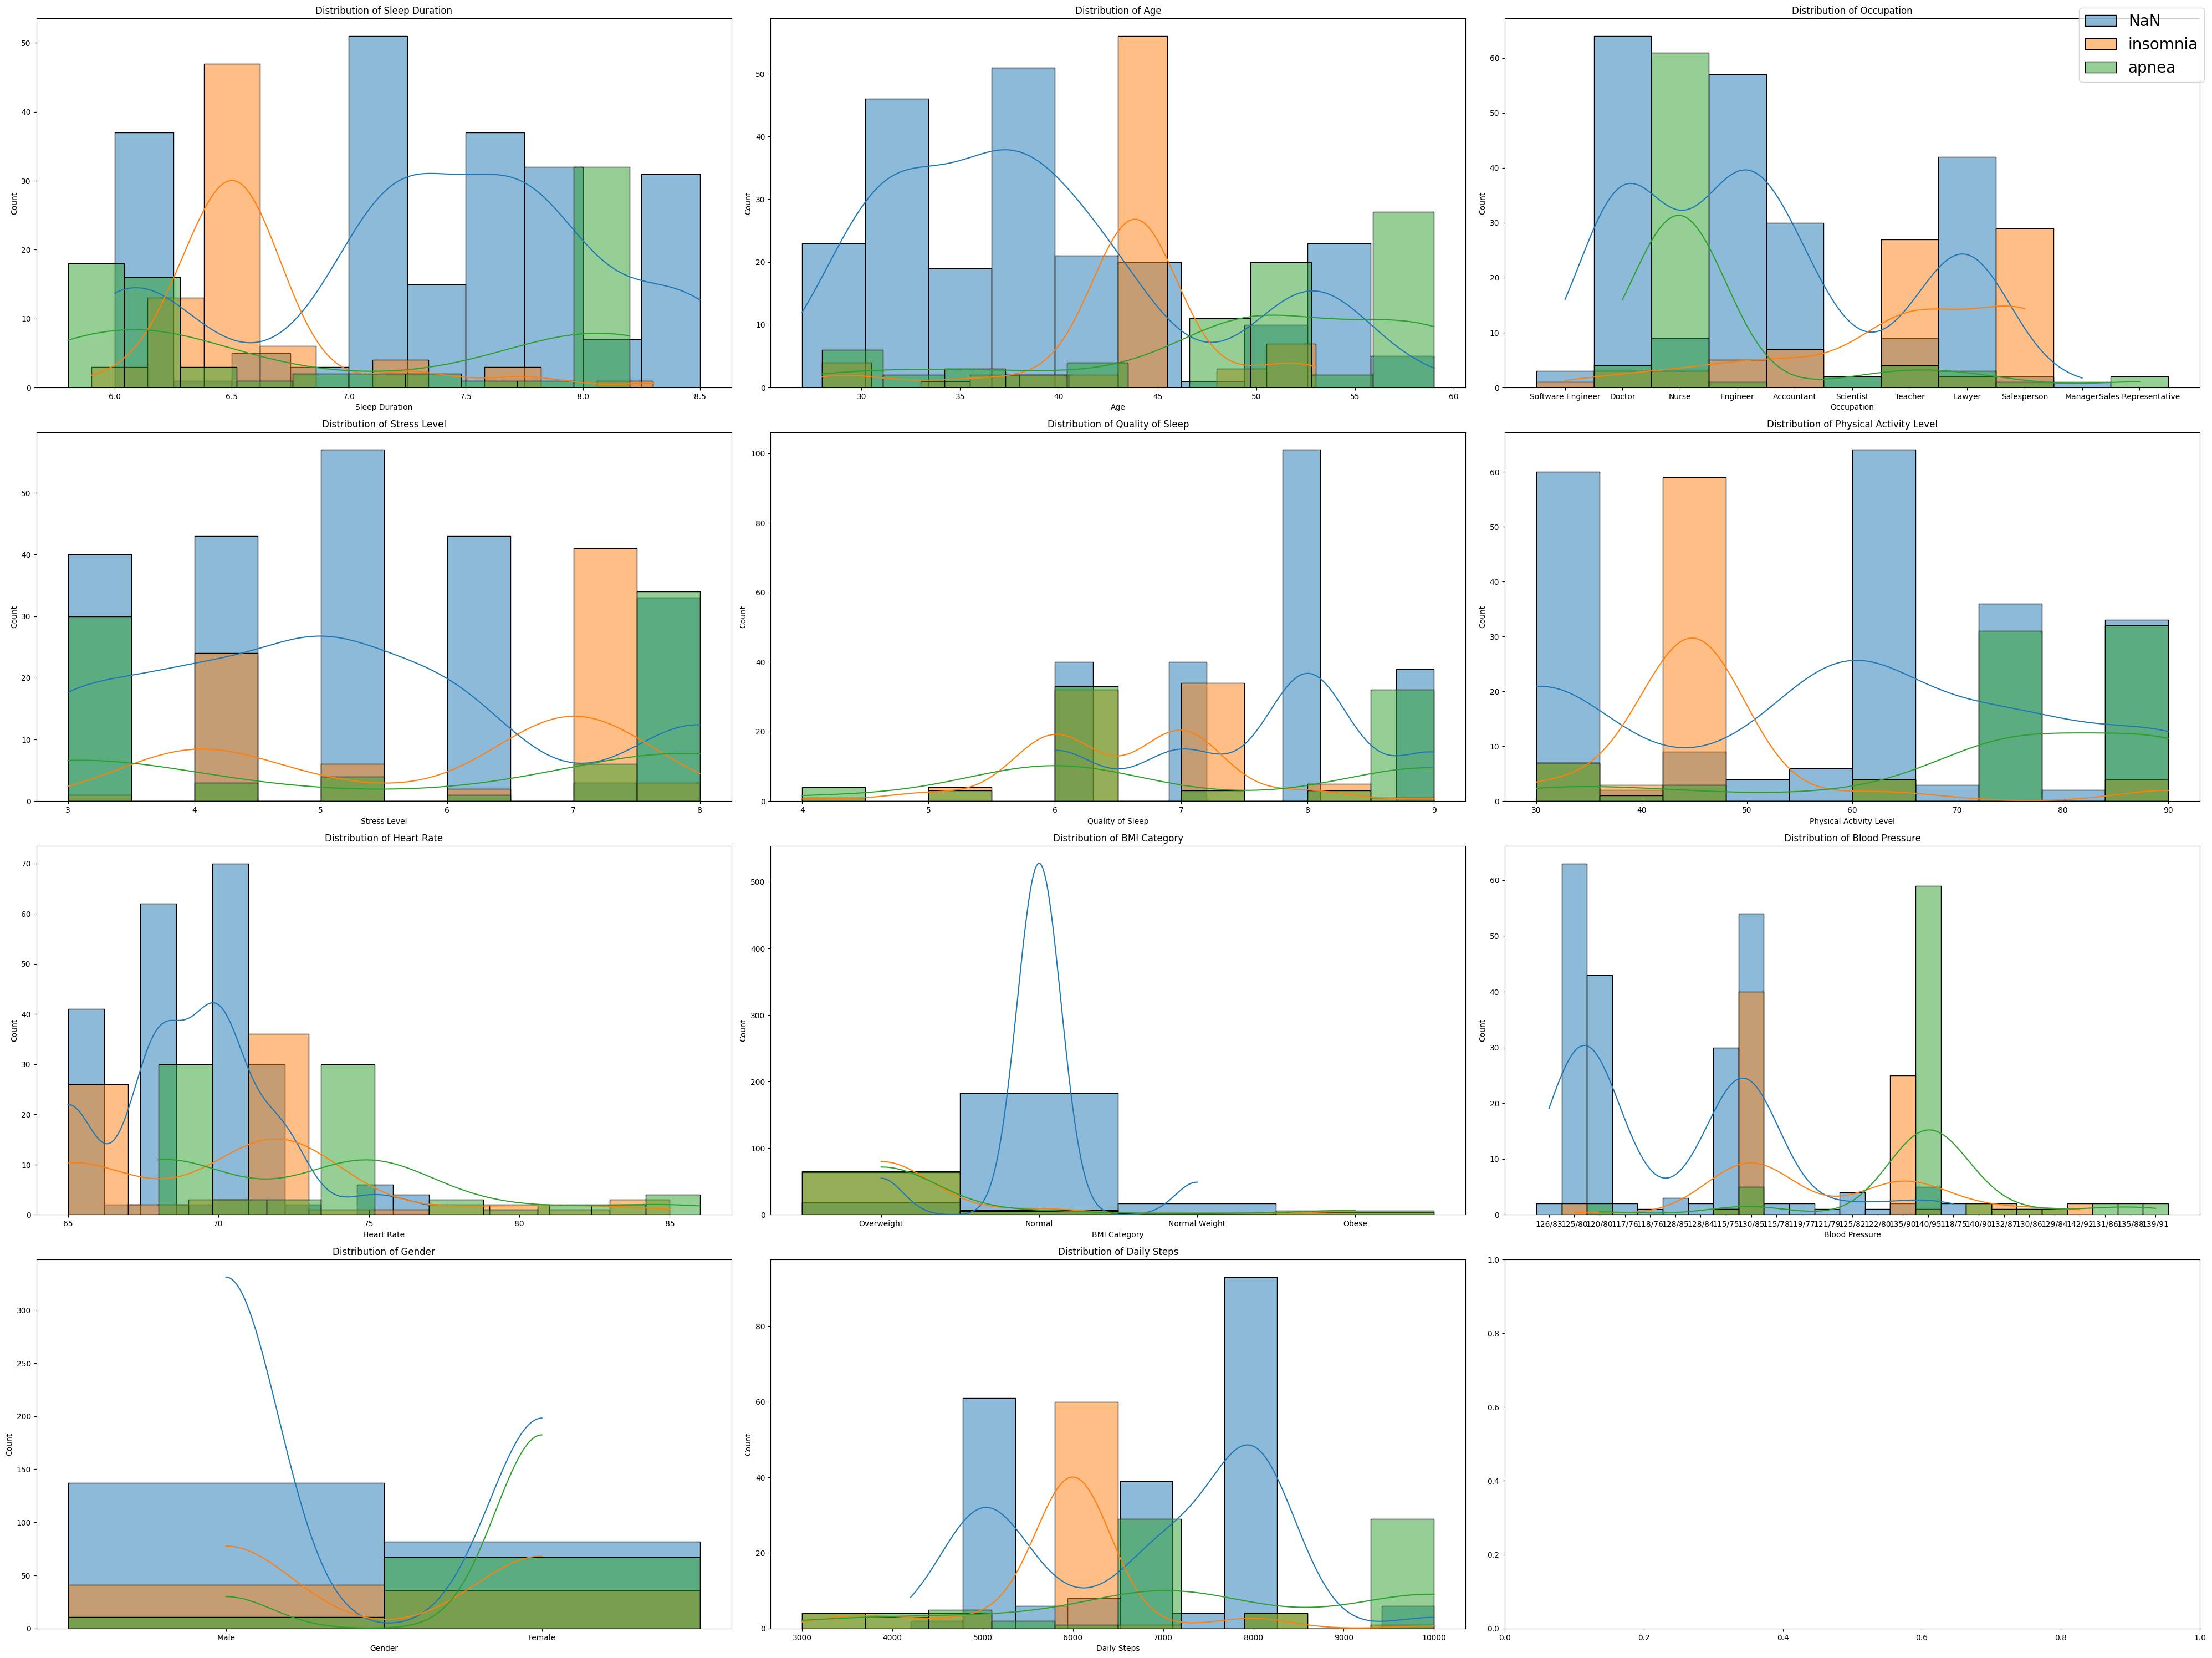

In [225]:
df_of_insomnia = df[df['Sleep Disorder'] == 'Insomnia'].drop(labels=['Person ID', 'Sleep Disorder'], axis=1)
display(df_of_insomnia.describe())

df_of_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea'].drop(labels=['Person ID', 'Sleep Disorder'], axis=1)
display(df_of_apnea.describe())

mask_of_NaN = df["Sleep Disorder"].isna()
df_of_NaN = df[mask_of_NaN].drop(labels=['Person ID', 'Sleep Disorder'], axis=1)
display(df_of_NaN.describe())

fig, axes = plt.subplots(4, 3, figsize=(40, 30))

for i, feature in enumerate(df_of_apnea.columns):
    row, col = (i-1) // 3, i % 3
    sns.histplot(df_of_NaN[feature], kde=True, ax=axes[row][col], bins=10, label="NaN")
    sns.histplot(df_of_insomnia[feature], kde=True, ax=axes[row][col], bins=10, label="insomnia")
    sns.histplot(df_of_apnea[feature], kde=True, ax=axes[row][col], bins=10, label="apnea")

    axes[row][col].set_title(f'Distribution of {feature}')

# Extract legend handles and labels from the last subplot
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=20)  # Single legend for all plots

output_path = "health_dpp_comparison_of_columns.png"  # Ensure the extension is specified
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

#### Decision on filling NaN values:
- Based on the argument given above, we decide to fill in "No Sleep Disorder".

In [226]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')

### Hypothesis Testing:

#### Does women’s sleep duration follow a normal distribution?


##### Answering using visualization: 
- No it's not normally distributed.

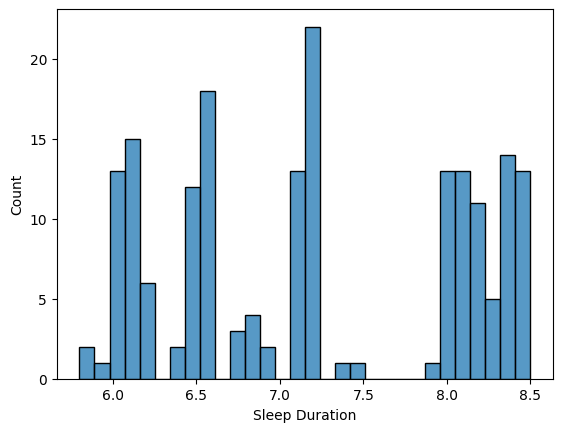

In [227]:
sns.histplot(df[df['Gender'] == 'Female']['Sleep Duration'], bins=30, edgecolor='black')
output_path = "health_distribution_of_sleep_duration_women.png"  # Ensure the extension is specified
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

##### Answering through Hypothesis Testing:
- No it's not normally distributed

In [228]:
stat, p = stats.shapiro(df[df['Gender'] == 'Female']['Sleep Duration'])
print(f'Statistics={stat}, p={p}')

if p > 0.05:
    print("Likely normal (fail to reject H0)")
else:
    print("Not normal (reject H0)")


Statistics=0.8985763558917751, p=6.360571286948505e-10
Not normal (reject H0)


#### Is having higher daily steps a contributing factor into better sleep? Check the corresponding correlation of Daily Steps and Quality of Sleep.

##### First we need to check the assumptions to see whether we can perform Pearson Correlation test.

###### Linearity:
- The plot shows that, the relationship between this two variables is not linear. So we go Spearman Correlation test.

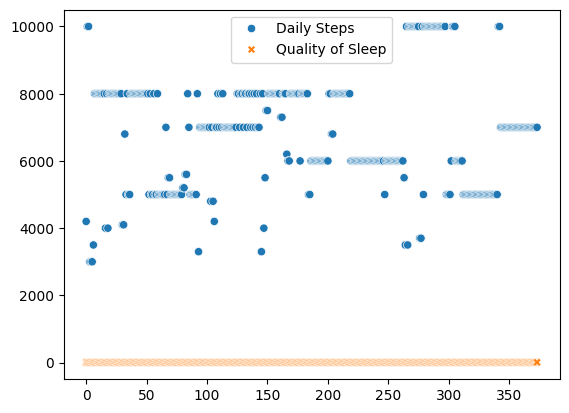

In [229]:
sns.scatterplot(df[['Daily Steps', 'Quality of Sleep']])
output_path = "health_scatter_plot_of_daily_steps_quality_of_sleep.png"  # Ensure the extension is specified
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

##### The assumptions (Linearity) for Pearson Correlation test didn't seem to hold. So we go for Spearman Correlation test.
- Based on the results, we can say that these two variables are not significantly correlated.

In [230]:
# Perform Spearman's correlation test
spearman_corr, p_value = stats.spearmanr(df['Daily Steps'], df['Quality of Sleep'], nan_policy='omit')

# Print results
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant correlation exists between 'Daily Steps' and 'Quality of Sleep'.")
else:
    print("No significant correlation found between 'Daily Steps' and 'Quality of Sleep'.")

Spearman Correlation Coefficient: 0.022779213378418182
P-value: 0.6605808344543287
No significant correlation found between 'Daily Steps' and 'Quality of Sleep'.


#### Is stress level different among different occupations? First, check this hypothesis with a test, and then compute the average stress level among different occupations. Use a bar chart or any other desired visualization method to demonstrate the result

##### Asnwering based on Visualizing:
- Yes there are significant difference between groups. e.g., we can clearly see that all the people with occupation Nurse are on a high level of stress with, contrasted with the people who are Engineer annd are on a low level of stress.

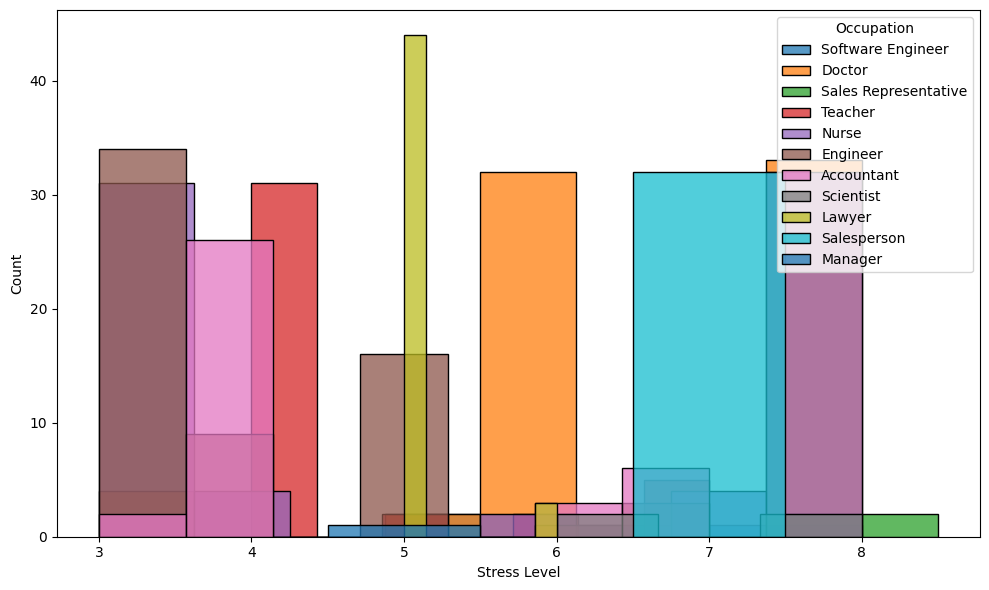

In [231]:
occupations = list(enumerate(df['Occupation'].unique()))
occupations_df = [df[df['Occupation'] == occupation[1]]['Stress Level'] for occupation in occupations]

plt.figure(figsize=(10, 6))  # Adjust the dimensions as needed
for occupation in occupations:
    # print(occupation)
    occu_stress_level_df = df[df['Occupation'] == occupation[1]]['Stress Level']
    sns.histplot(occu_stress_level_df, label=occupation[1])

plt.legend(title='Occupation', loc='upper right')
# Show the plot
plt.tight_layout()  # Ensures the legend doesn't get cut off
output_path = "health_distribution_of_stress_level_for_occupations.png"  # Ensure the extension is specified
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

##### Asnwering based on Hypothesis Test:
- Yes there are significant difference between groups

In [232]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*occupations_df)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There are significant differences between the occupations.")
else:
    print("No significant differences between the occupations.")

F-statistic: 21.63598878521177
P-value: 1.355091231304278e-31
There are significant differences between the occupations.


#### Are different BMI categories significantly different given their blood pressure? (Hint: Convert blood pressure into two columns and apply your test given these new two features.)

##### Answering based on MANOVA test:
- Since the p-value for all of the tests is ~0.0000, we can conclude that, BMI categoriy, significantly determines the Diastolic_BP and Systolic_BP

In [233]:
from statsmodels.multivariate.manova import MANOVA

# Split the Blood Pressure column into Systolic and Diastolic
df_for_manova = df
df_for_manova[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df_for_manova['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df_for_manova['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df_for_manova.rename(columns={'BMI Category': 'BMI_Category'}, inplace=True)
# df_for_manova

manova = MANOVA.from_formula('Systolic_BP + Diastolic_BP ~ C(BMI_Category)', data=df_for_manova)
print(manova.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0029 2.0000 369.0000 63410.2541 0.0000
         Pillai's trace   0.9971 2.0000 369.0000 63410.2541 0.0000
 Hotelling-Lawley trace 343.6870 2.0000 369.0000 63410.2541 0.0000
    Roy's greatest root 343.6870 2.0000 369.0000 63410.2541 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
        C(BMI_Category)     Value  Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.3412 6.0000 738.0000  87.5857 0.0000
             Pil

#### Do people with sleep disorders have higher heart rates than those without any sleep disorder?

##### Answering based on Visualization:
- Yes, based on the plot below we can say, that people with Sleep Disorder have higher heart rates usually.

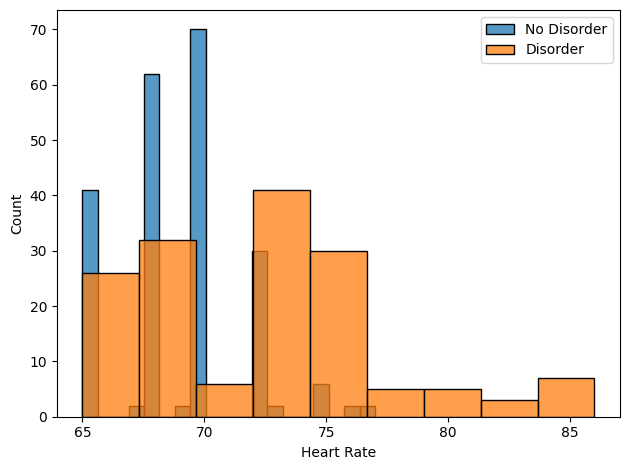

In [234]:
df_of_no_disorder = df[df['Sleep Disorder'] == 'No Sleep Disorder']['Heart Rate']
df_of_disorder = df[df['Sleep Disorder'] != 'No Sleep Disorder']['Heart Rate']

sns.histplot(df_of_no_disorder, label='No Disorder')
sns.histplot(df_of_disorder, label='Disorder')

plt.legend()
output_path = "health_distribution_of_heart_rate_for_people_with_and_without_disorder.png"  # Ensure the extension is specified
plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

##### Answering based on Hypothesis Testing:
- Yes, There are significant differences between the people with and without Sleep Disorder.

In [235]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df_of_no_disorder, df_of_disorder)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("No significant differences between the groups.")

F-statistic: 45.5400838475208
P-value: 5.749587721474387e-11
There are significant differences between the groups.


## Student Performance Factors

### Exploratory Data Analysis (EDA): 

#### Loading the dataset and figuring out it's shape

In [236]:
df = pd.read_csv('StudentPerformanceFactors.csv')
display(df.head())
df.shape

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


(6607, 20)

#### An overview of the columns, their data types and statistics

In [237]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#### Figuring out the range of values that categorical features could take on 

In [238]:
categorical_dtypes = df.select_dtypes(exclude=[np.number])
for cat in categorical_dtypes:
    print(cat, df[cat].unique()) 

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low' nan]
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home ['Near' 'Moderate' 'Far' nan]
Gender ['Male' 'Female']


#### Data Pre-processing:

##### Plotting Distribution of Students who have some NaN values in their columns against the ones who have not, for each single features:
- From the plots below, we can see that the features, for students who have some missing entries, are evenly distributes over the whole range of the original distribution where all of the students are included. 

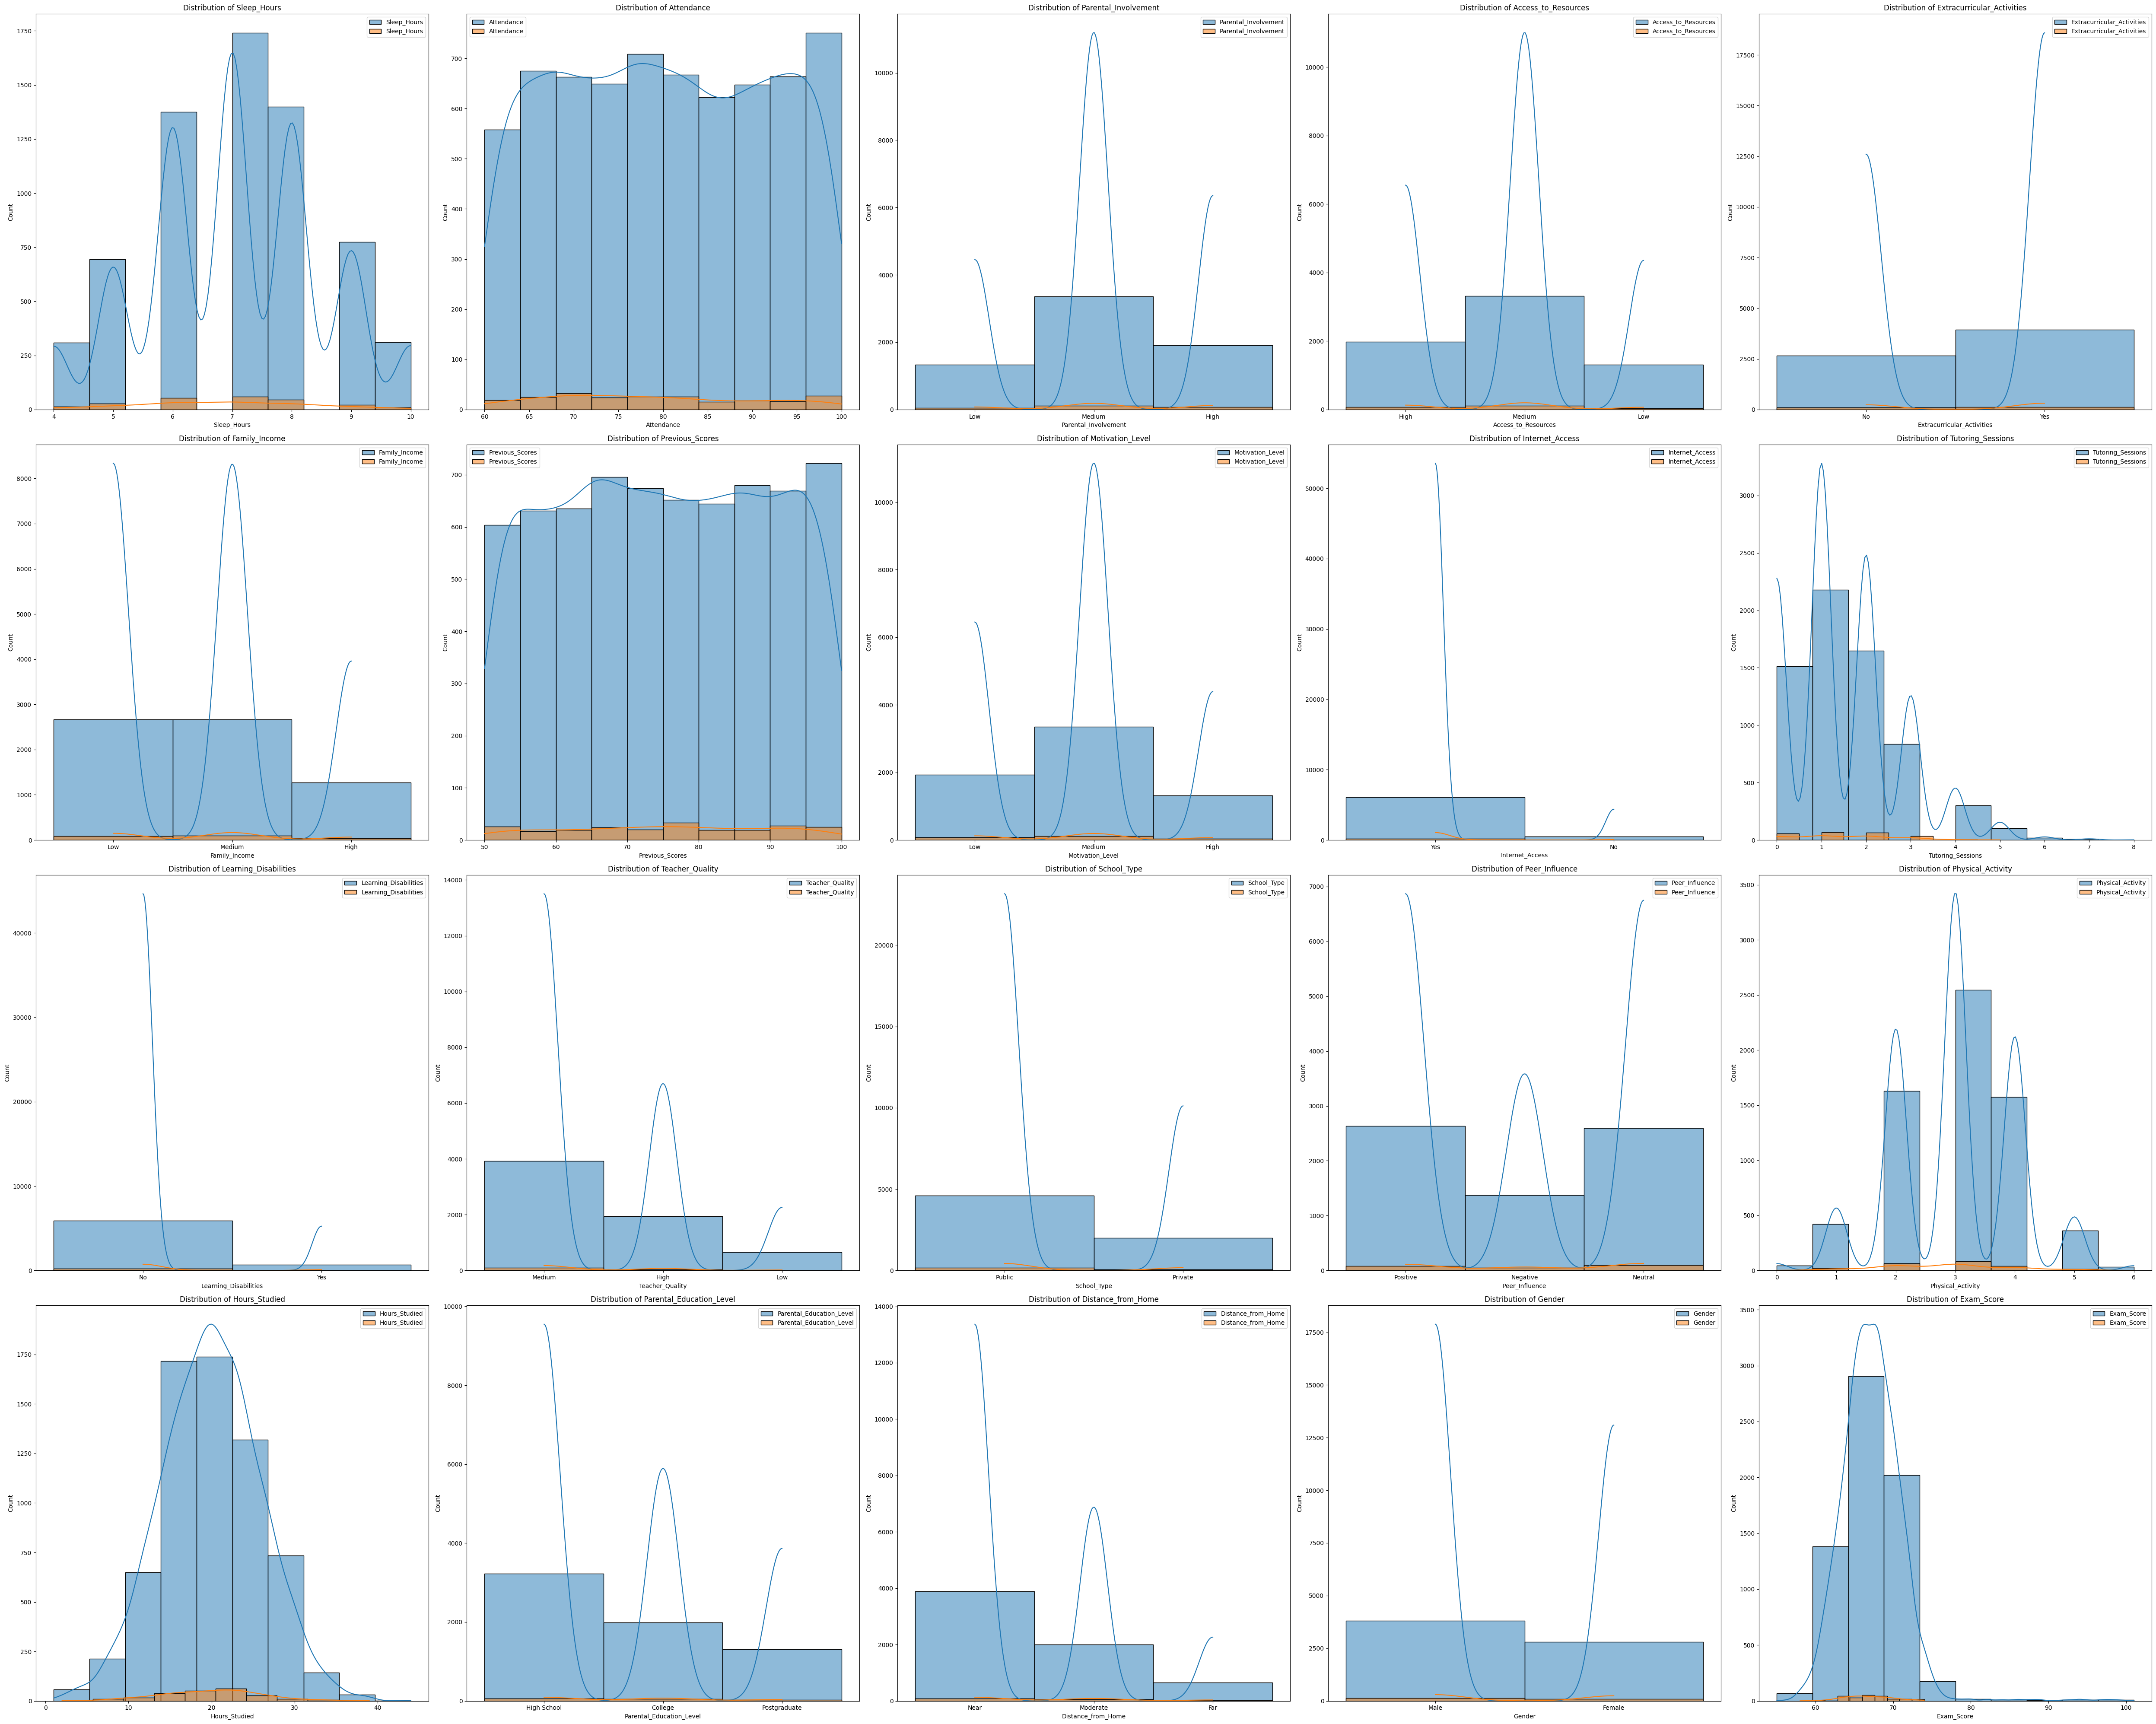

In [239]:
fig, axes = plt.subplots(4, 5, figsize=(50, 40))
df_of_na_students = df[df.isna().any(axis=1)]

for i, feature in enumerate(df.columns):
    row, col = (i-1) // 5, i % 5
    sns.histplot(df[feature], kde=True, ax=axes[row][col], bins=10, label=feature)
    sns.histplot(df_of_na_students[feature], kde=True, ax=axes[row][col], bins=10, label=feature)
    axes[row][col].set_title(f'Distribution of {feature}')
    axes[row][col].legend()  # Add legend to each subplot

plt.tight_layout()
output_path = "student_distribution_of_columns.png"  # Ensure the extension is specified
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

##### Decission on students which have some NaN values:
- from the evidences given above, we can conclude that the students who have some missing entries don't differ that much from the other students, so we can just drop them all.

In [240]:
df = df.dropna(axis=0)

### Hypothesis Testing:

#### Is Sleep_Hours correlated with Exam_Score?
- No, They are not significantly correlated. 

In [241]:
r, p_value = stats.pearsonr(df['Sleep_Hours'], df['Exam_Score'])
print(f'Correlation: {r}')
if p_value > 0.05:
    print(f'p_value is: {p_value}. Sleep_Hours and Exam_Score are not possibly correlated')
else:
    print(f'p_value is: {p_value}. Sleep_Hours and Exam_Score are possibly correlated')


Correlation: -0.01717144621634847
p_value is: 0.17031732819959972. Sleep_Hours and Exam_Score are not possibly correlated


#### Does School_Type affect Exam_Score? 
- No, School_Type doesn\'t significantly determine Exam_Score                                                                                        

In [242]:
public_group = df[df['School_Type'] == 'Public']['Exam_Score']
private_group = df[df['School_Type'] == 'Private']['Exam_Score']

f_stat, p_value = stats.f_oneway(public_group, private_group)

if p_value > 0.05:
    print(f'f_stat is: {f_stat}, p_value is: {p_value}. School_Type doesn\'t significantly determine Exam_Score')
else:
    print(f'f_stat is: {f_stat}, p_value is: {p_value}. School_Type does significantly determine Exam_Score')


f_stat is: 0.7531963873423186, p_value is: 0.3854987810260675. School_Type doesn't significantly determine Exam_Score


#### Does Teacher_Quality affect Previous_Scores or Exam_Score?
- Yes, It actually affects both of these features significantly.

In [243]:
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('Previous_Scores + Exam_Score ~ Teacher_Quality', df)
print(manova.mv_test())

# Perform ANOVA on Math Scores
f_stat_math, p_math = stats.f_oneway(
    df[df['Teacher_Quality'] == 'Low']['Exam_Score'],
    df[df['Teacher_Quality'] == 'Medium']['Exam_Score'],
    df[df['Teacher_Quality'] == 'High']['Exam_Score']
)
print(f"Exam Score ANOVA: F={f_stat_math:.3f}, p={p_math:.3f}")

# Perform ANOVA on Science Scores
f_stat_sci, p_sci = stats.f_oneway(
    df[df['Teacher_Quality'] == 'Low']['Previous_Scores'],
    df[df['Teacher_Quality'] == 'Medium']['Previous_Scores'],
    df[df['Teacher_Quality'] == 'High']['Previous_Scores']
)
print(f"Previous Score ANOVA: F={f_stat_sci:.3f}, p={p_sci:.3f}")

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0108 2.0000 6374.0000 291099.7605 0.0000
         Pillai's trace  0.9892 2.0000 6374.0000 291099.7605 0.0000
 Hotelling-Lawley trace 91.3397 2.0000 6374.0000 291099.7605 0.0000
    Roy's greatest root 91.3397 2.0000 6374.0000 291099.7605 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
        Teacher_Quality     Value  Num DF   Den DF   F Value Pr > F
-------------------------------------------------------------------
              Wilks' lambda 0.9930 4.0000 12748.0000 11.2606 0.0000
 

#### Do Previous_Scores influence Exam_Score? 
- Yes, it really influences the Exam_Score.

In [244]:
r, p_value = stats.spearmanr(df['Previous_Scores'], df['Exam_Score'])
print(f'Correlation: {r}')
if p_value > 0.05:
    print(f'p_value is: {p_value}. Previous_Scores and Exam_Score are not possibly correlated')
else:
    print(f'p_value is: {p_value}. Previous_Scores and Exam_Score are possibly correlated')

Correlation: 0.19111637222616798
p_value is: 1.5821805765966484e-53. Previous_Scores and Exam_Score are possibly correlated


#### Is Sleep_Hours normally distributed? 
- No, it doesn't follow a normal distribution.

In [245]:
from scipy.stats import kstest

stat, p = kstest(df['Sleep_Hours'], 'norm', args=(df['Sleep_Hours'].mean(), df['Sleep_Hours'].std()))
print(f"KS Test Statistic: {stat:.3f}, p-value: {p:.3f}")

if p > 0.05:
    print("Data follows a normal distribution")
else:
    print("Data does not follow a normal distribution")

KS Test Statistic: 0.132, p-value: 0.000
Data does not follow a normal distribution
